1. Trend Analysis:
o How have the total deaths from unintentional injuries changed from 1999 to 2015
across the entire United States?

<Axes: title={'center': 'Total Deaths from Unintentional Injuries (1999-2015)'}, xlabel='Year'>

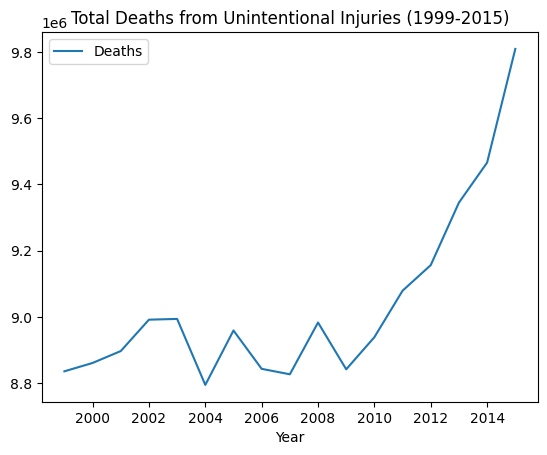

In [1]:
import pandas as pd

# Load the dataset
file_path = 'NCHS.csv'
nchs_data = pd.read_csv(file_path)

# Grouping the data by Year to calculate the total deaths per year
total_deaths_per_year = nchs_data.groupby('Year')['Deaths'].sum().reset_index()

# Plotting the trend
total_deaths_per_year.plot(x='Year', y='Deaths', kind='line', title='Total Deaths from Unintentional Injuries (1999-2015)')


Which states had the highest and lowest age-adjusted death rates from unintentional injuries in 1999 and 2015?

In [2]:
# Extracting data for the years 1999 and 2015
data_1999 = nchs_data[nchs_data['Year'] == 1999]
data_2015 = nchs_data[nchs_data['Year'] == 2015]

# Finding the states with the highest and lowest age-adjusted death rates in 1999 and 2015
highest_1999 = data_1999.loc[data_1999['Age-adjusted Death Rate'].idxmax()]
lowest_1999 = data_1999.loc[data_1999['Age-adjusted Death Rate'].idxmin()]

highest_2015 = data_2015.loc[data_2015['Age-adjusted Death Rate'].idxmax()]
lowest_2015 = data_2015.loc[data_2015['Age-adjusted Death Rate'].idxmin()]

print("Highest in 1999:", highest_1999)
print("Lowest in 1999:", lowest_1999)
print("Highest in 2015:", highest_2015)
print("Lowest in 2015:", lowest_2015)


Highest in 1999: Year                                       1999
113 Cause Name                       All Causes
Cause Name                           All Causes
State                      District of Columbia
Deaths                                   6076.0
Age-adjusted Death Rate                  1087.3
Name: 900, dtype: object
Lowest in 1999: Year                                                              1999
113 Cause Name             Pneumonitis due to solids and liquids (J69)
Cause Name                       Pneumonitis due to solids and liquids
State                                                       California
Deaths                                                           355.0
Age-adjusted Death Rate                                            1.3
Name: 13264, dtype: object
Highest in 2015: Year                              2015
113 Cause Name              All Causes
Cause Name                  All Causes
State                      Mississippi
Deaths                      

How did the age-adjusted death rate for unintentional injuries change in each state from 1999 to 2015?

In [3]:
# Calculate the change in age-adjusted death rates from 1999 to 2015 for each state
age_adjusted_1999 = data_1999[['State', 'Age-adjusted Death Rate']].set_index('State')
age_adjusted_2015 = data_2015[['State', 'Age-adjusted Death Rate']].set_index('State')

# Merging the 1999 and 2015 data to calculate the difference
age_adjusted_change = age_adjusted_2015.rename(columns={'Age-adjusted Death Rate': 'Rate_2015'}).join(
    age_adjusted_1999.rename(columns={'Age-adjusted Death Rate': 'Rate_1999'})
)

# Calculating the change in death rate
age_adjusted_change['Change'] = age_adjusted_change['Rate_2015'] - age_adjusted_change['Rate_1999']

# Display the states with the highest and lowest changes
age_adjusted_change.sort_values('Change', ascending=False)


,Rate_2015,Rate_1999,Change
State,,,
Mississippi,963.7,4.5,959.2
Mississippi,963.7,7.0,956.7
Mississippi,963.7,9.3,954.4
Mississippi,963.7,9.4,954.3
Mississippi,963.7,10.9,952.8
...,...,...,...
Wyoming,6.8,NaN,NaN
Wyoming,3.3,NaN,NaN
Wyoming,3.3,NaN,NaN


What is the year-over-year percentage change in the number of deaths due to unintentional injuries for the top 5 states with the highest death rates?

In [4]:
# Top 5 states with the highest death rates in 2015
top_5_states = data_2015.sort_values('Deaths', ascending=False).head(5)['State']

# Year-over-Year percentage change
yoy_change = nchs_data[nchs_data['State'].isin(top_5_states)].groupby(['State', 'Year'])['Deaths'].sum().pct_change().reset_index()

print(yoy_change)


            State  Year     Deaths
0      California  1999        NaN
1      California  2000  -0.001411
2      California  2001   0.014110
3      California  2002   0.010343
4      California  2003   0.019807
5      California  2004  -0.029722
6      California  2005   0.016743
7      California  2006  -0.001435
8      California  2007  -0.014033
9      California  2008   0.003413
10     California  2009  -0.008476
11     California  2010   0.005112
12     California  2011   0.022798
13     California  2012   0.008590
14     California  2013   0.022700
15     California  2014  -0.007902
16     California  2015   0.057650
17        Florida  1999  -0.369779
18        Florida  2000   0.004281
19        Florida  2001   0.018035
20        Florida  2002   0.001367
21        Florida  2003   0.002196
22        Florida  2004  -0.000123
23        Florida  2005   0.009747
24        Florida  2006  -0.011172
25        Florida  2007  -0.011944
26        Florida  2008   0.013899
27        Florida  2

Is there a correlation between the age-adjusted death rate and the number of deaths for unintentional injuries across states?

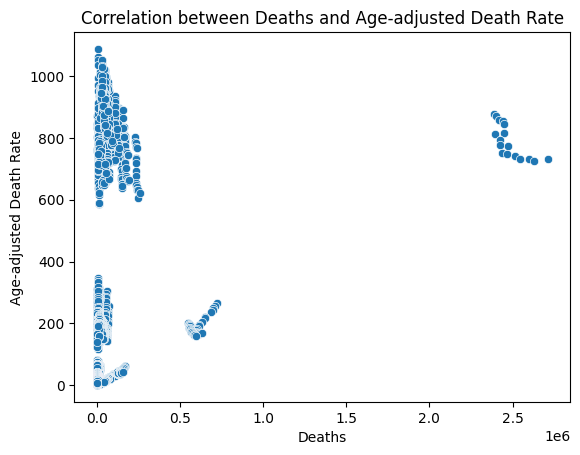

Correlation matrix:                            Deaths  Age-adjusted Death Rate
Deaths                   1.000000                 0.243092
Age-adjusted Death Rate  0.243092                 1.000000


In [7]:
import seaborn as sns

# Calculating correlation
correlation = nchs_data[['Deaths', 'Age-adjusted Death Rate']].corr()

# Plotting
sns.scatterplot(x='Deaths', y='Age-adjusted Death Rate', data=nchs_data)
plt.title('Correlation between Deaths and Age-adjusted Death Rate')
plt.show()

print("Correlation matrix:", correlation)


Which 10 states consistently had the highest death rates from unintentional injuries from 1999 to 2015?

In [8]:
top_10_states_over_time = nchs_data.groupby(['State'])['Deaths'].sum().sort_values(ascending=False).head(10)

print(top_10_states_over_time)


State
United States     76811133.0
California         7467282.0
Florida            5331317.0
Texas              5048222.0
New York           4757239.0
Pennsylvania       3966825.0
Ohio               3397289.0
Illinois           3225662.0
Michigan           2751878.0
North Carolina     2372383.0
Name: Deaths, dtype: float64


Did any specific years see significant spikes or drops in death rates, possibly correlating with specific events?

<Axes: title={'center': 'Year-over-Year Change in Deaths'}, xlabel='Year'>

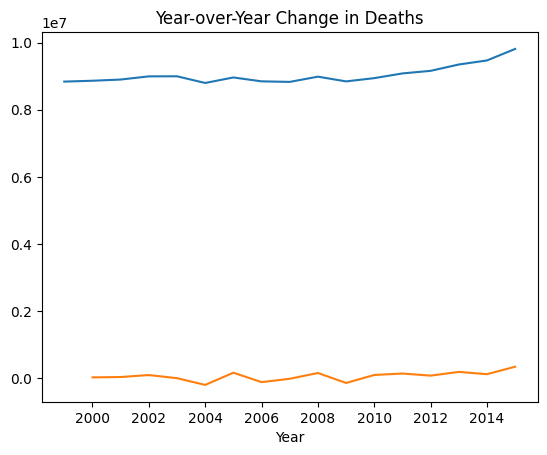

In [9]:
# Plotting the overall trend for all states
nchs_data.groupby('Year')['Deaths'].sum().plot(kind='line', title='Total Deaths from Unintentional Injuries (1999-2015)')

# Identifying spikes or drops
nchs_data.groupby('Year')['Deaths'].sum().diff().plot(kind='line', title='Year-over-Year Change in Deaths')


How do the trends in unintentional injury deaths compare with other leading causes of death over the same period?

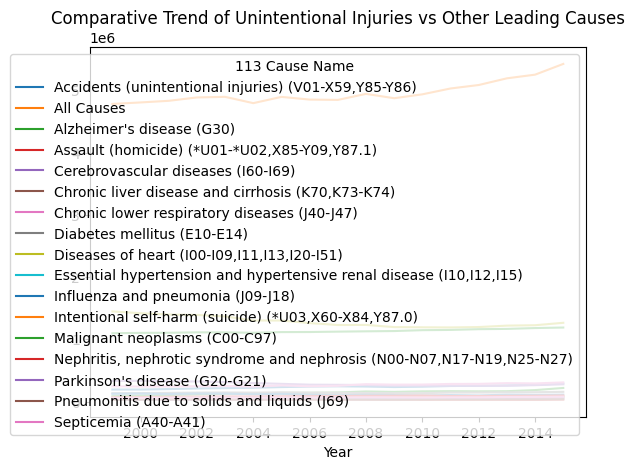

In [10]:
# Filter for other leading causes of death and compare trends
leading_causes = nchs_data['113 Cause Name'].unique()  # Example, or manually select other leading causes

comparative_trend = nchs_data[nchs_data['113 Cause Name'].isin(leading_causes)].groupby(['Year', '113 Cause Name'])['Deaths'].sum().unstack().plot(kind='line')

plt.title('Comparative Trend of Unintentional Injuries vs Other Leading Causes')
plt.show()


Can a heatmap reveal any spatial or temporal patterns in unintentional injury death rates across the U.S.?

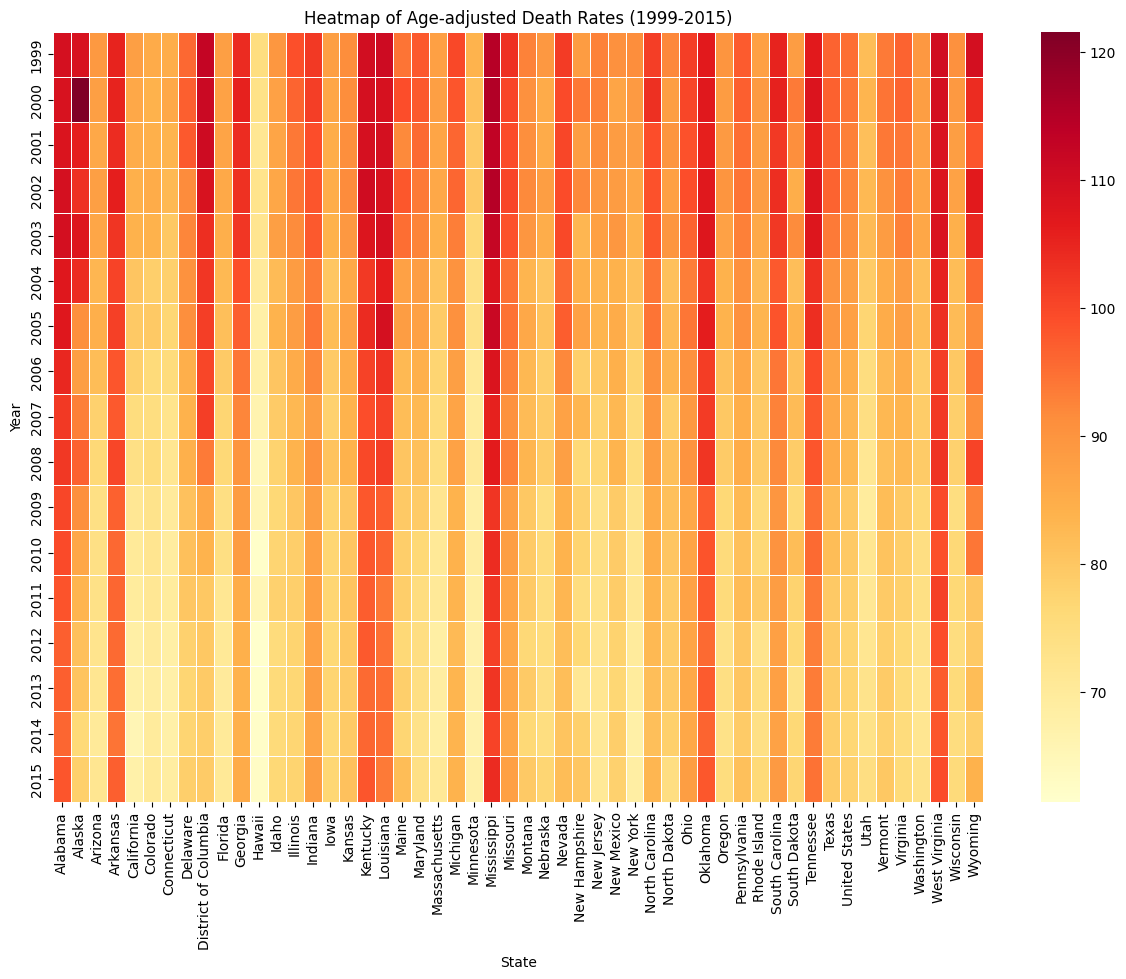

In [15]:
import seaborn as sns

# Create a pivot table for the heatmap (Year vs State)
heatmap_data = nchs_data.pivot_table(values='Age-adjusted Death Rate', index='Year', columns='State')

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=.5)
plt.title('Heatmap of Age-adjusted Death Rates (1999-2015)')
plt.show()


How did the death rates from unintentional injuries evolve in states with large populations (e.g., California, Texas) compared to smaller states (e.g., Delaware, Maine)?

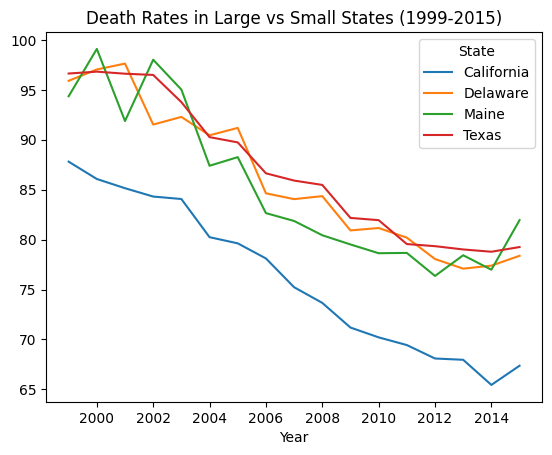

In [16]:
# Assuming there's a 'Population' column in the dataset
large_states = ['California', 'Texas']
small_states = ['Delaware', 'Maine']

# Filtering the dataset for these states
large_vs_small = nchs_data[nchs_data['State'].isin(large_states + small_states)]

# Plotting
large_vs_small.groupby(['Year', 'State'])['Age-adjusted Death Rate'].mean().unstack().plot(kind='line')

plt.title('Death Rates in Large vs Small States (1999-2015)')
plt.show()


Based on historical data, can a predictive model estimate future trends in unintentional injury death rates?

Mean Squared Error: 37005.601958068444


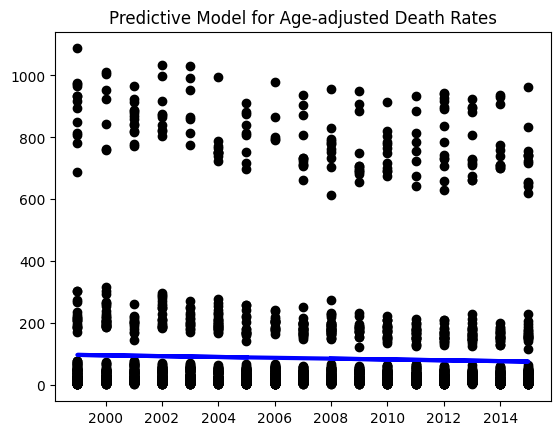

In [20]:
# Drop rows where 'Age-adjusted Death Rate' is NaN
nchs_data_clean = nchs_data.dropna(subset=['Age-adjusted Death Rate'])

# Preparing the data again
X = nchs_data_clean[['Year']]
y = nchs_data_clean['Age-adjusted Death Rate']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plotting the predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Predictive Model for Age-adjusted Death Rates')
plt.show()
